# Car Sales Classifier 
##### Cam Chetcuti and Cole Elfstrom 

In [1]:
# some useful mysklearn package import statements and reloads
import importlib

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import myutils 
importlib.reload(myutils)
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyDummyClassifier, MyNaiveBayesClassifier
import myclassifiers

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

import matplotlib.pyplot as plt

### Introduction:  

* Why we chose this topic:
    - Car prices have been inflated recently and were something we wanted to look into classifying
    - Lots of data is avalaible on car sales as it generally involves the government or a business 
    - There are plenty of attributes we could classify on 
* Our Data Set:
    - After our data cleaning there are about 13,000 instances
    - Very noisy data

| Attribute     | Type      | Notes                                         |
| pricesold     | int       |Our Class label; will require discretization   |
| make          | string    |                                               |
| model         | string    |                                               |
| yearsold      | int       |                                               |
| year          | int       |                                               |
| Trim          | string    |                                               |
| mileage       | int       |                                               |
| Engine        | string    |                                               |
| Cylinders     | int       |                                               |
| BodyType      | string    |                                               |
| DriveType     | string    |                                               |



     

### Exploratory Data Analysis:  
* Before we can gain some insight into our data set, we have to clean up the noise  



In [2]:
auto_dataset = MyPyTable().load_from_file("used_car_sales.csv")

In [3]:
auto_dataset = myutils.clean_data(auto_dataset)
auto_dataset_explored = MyPyTable(column_names=["pricesold","yearsold","Make","Model","Year","BodyType","NumCylinders","DriveType"])
auto_dataset_explored = mysklearn.myutils.create_MyPyTable_for_auto_set(auto_dataset)
auto_dataset_explored.remove_rows_with_missing_values()
prices = auto_dataset_explored.get_column("pricesold")
discritized_prices, ranges = myutils.discretize_sales_price(prices)
price_sold = auto_dataset.get_column("pricesold")
year_sold = auto_dataset.get_column("yearsold")
make = auto_dataset.get_column("Make")
year = auto_dataset.get_column("Year")
body_type = auto_dataset.get_column("BodyType")
num_cylinders = auto_dataset.get_column("NumCylinders")
drive_type = auto_dataset.get_column("DriveType")

In [4]:
X_train = mysklearn.myutils.create_X_train_for_auto_set_without_prices(auto_dataset_explored)
folds = myevaluation.stratified_kfold_split(X_train, discritized_prices, random_state=0)
actual_train_folds = []
actual_test_folds = []
for fold in folds:
    temp_x_train = []
    temp_x_test = []
    temp_y_train = []
    temp_y_test = []
    place = 0
    for item in fold:   
        for i in item:
            if place == 0:
                temp_x_train.append([year_sold[i], make[i], year[i], body_type[i], num_cylinders[i], drive_type[i]])
                temp_y_train.append(discritized_prices[i])
                
            else:
                temp_x_test.append([year_sold[i], make[i], year[i], body_type[i], num_cylinders[i], drive_type[i]])
                temp_y_test.append(discritized_prices[i])
        place += 1
    actual_train_folds.append((temp_x_train, temp_y_train))
    actual_test_folds.append((temp_x_test, temp_y_test))
count = 1

header = ["year_sold", "make", "year", "body_type", "cylinders", "drive_type"]

### Fixing Noise

In [5]:

X_train = actual_test_folds[0][0]
y_train = actual_train_folds[0][1]
X_test = actual_test_folds[0][0]
y_test = actual_test_folds[0][1]

myutils.X_train_bodystyle_noise_reduction(X_train)
myutils.X_train_bodystyle_noise_reduction(X_test)
myutils.discretize_year(X_train)
myutils.clean_cylinder_count(X_train)
myutils.clean_cylinder_count(X_test)
myutils.clean_drive_type(X_train)
myutils.clean_drive_type(X_test)

all_values = []
for val in X_train:
    if val[2] not in all_values:
        all_values.append(val[2])



Now that our data is clean we can plot some of our attributes

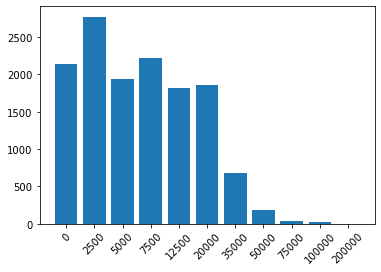

In [6]:
myutils.plot_prices(discritized_prices, ranges)

From our undiscretized prices above, it is clear that a majority of cars are sold around the 2500-7500$ range. 

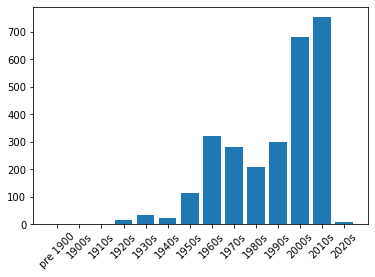

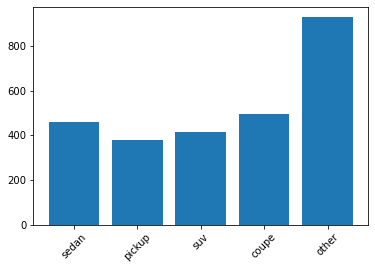

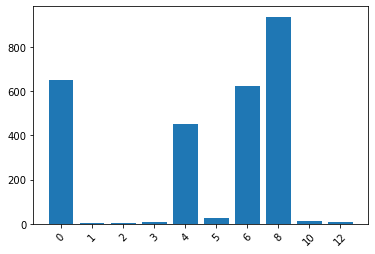

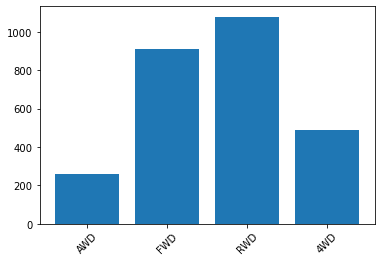

In [7]:
myutils.plot_all_att(X_train)

### Classification Results:  
* Classifiers Used:
    - Dummy Classifier
    - Naive Bayes
    - Random Forest
* How we measured accuracy:
    - using a basic accuracy and erorr score from the myevaluation class
* Results:
    - All Classifiers are about 20% accurate, which proves the difficulty of classifying using the attributes and data we selected 
* Our "Best" Classifier:
    - Generally the random forest performs best on our data, and with more refined dataset and less generalized attibutes it should perform much better 

### Dummy Classifier

In [8]:
dummy = MyDummyClassifier()
dummy.fit(X_train, y_train)
y_predicted = dummy.predict(actual_test_folds[0][0])
print("Accuracy: ", myevaluation.accuracy_score(actual_test_folds[0][1], y_predicted))
print("Error Rate: ", 1.0 - myevaluation.accuracy_score(actual_test_folds[0][1], y_predicted))
   

Accuracy:  0.20285609666788723
Error Rate:  0.7971439033321128


### Bayes Classifier

In [9]:
bayes = MyNaiveBayesClassifier()
bayes.fit(X_train, y_train)
y_predicted = bayes.predict(actual_test_folds[0][0])
print("Accuracy: ", myevaluation.accuracy_score(actual_test_folds[0][1], y_predicted))
print("Error Rate: ", 1.0 - myevaluation.accuracy_score(actual_test_folds[0][1], y_predicted))

Accuracy:  0.16257781032588794
Error Rate:  0.8374221896741121


### Random Forrest Classifier

In [12]:
importlib.reload(myclassifiers)
rf_clf = myclassifiers.MyRandomForestClassifier()
rf_clf.fit(X_train, y_train, X_test, y_test, 500, 20, 5)

In [13]:
y_predicted = rf_clf.predict(X_test, y_test)
print("Accuracy: ", myevaluation.accuracy_score(y_test, y_predicted))
print("Error Rate: ", 1.0 - myevaluation.accuracy_score(y_test, y_predicted))

Accuracy:  0.16257781032588794
Error Rate:  0.8374221896741121


### Conclusion:  
* Challenges/Improvement:  
    - Use more attributes or more descriptive/unique attributes 
    - Once that is done more fine tuning of N, M, F would be beneficial 
* Key Components of the code:
    - Our dicretization of each column used is vital and unique 
* Contributions:
    - Cam: Discretization and Decision Tree Classifier
    - Cole: Random Forest, testing, and discretization

* Our Dataset:
    - https://www.kaggle.com/datasets/tsaustin/us-used-car-sales-data
